## Revisão das Rodadas Anteriores

O CEO da A Xtreme Groovy Bikes Sales, que é uma empresa de revenda de motocicletas e tem o seu modelo de nogócio como revenda motocicletas usadas, contratou você como um consultor de ciência de dados para ajud-á-los a encontrar as melhores motos da base de dados que eles adquiriram através de um estudo de mercado. 

Na rodada passada foi realizado o estudo da base de dados e respondido algumas perguntas que o CEO fez utilizando a base de dados.

Agora, o CEO fez novas perguntas que devemos responder utilizando essa nova base de dados.

### Leitura do DataFrame da Aula anterior

In [1]:
# Bibliotecas
import pandas   as pd
import seaborn  as sns
import numpy    as np
from matplotlib import pyplot as plt

In [2]:
# tamanho fixo das figuras do dataset
plt.figure(figsize=(15,8));

<Figure size 1080x576 with 0 Axes>

In [3]:
df = pd.read_csv('C:\\Users\\mlsil\\OneDrive\\Documentos\\repos\\fundamentos_programacao\\csv\\bikes_completed.csv')
df.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,1,3,Royal Enfield
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,2,5,Honda
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,3,4,Royal Enfield
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,5,7,Yamaha
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,5,11,Yamaha


### Descrição das Colunas

| Coluna | Descrição |
| :----- | --------: |
| ID | Identificador da linha/registro |
| name | Fabricante e Modelo da Moto |
| selling_price | Preço de Venda |
| year | Ano de Fabricação da Moto |
| seller_type | Tipo de Vendedor - Se é vendedor pessoal ou revendedor |
| owner | Se é primeiro, segundo, terceiro ou quarto dono da moto |
| km_driven | Quantidade de Quilometros percorrido pela moto |
| ex_showroom_price | Preço da motocicleta sem as taxas de seguro e registro |
| km_class | Classificação das motos conforme a quilometragem percorrida |
| company | Fabricanete da Motocicleta |

## Novas Perguntas

Após analisar as respostas das perguntas anteriores, o CEO da XGB Sales lhe fez mais algumas perguntas:

1. Ajustar a coluna `name` para que ela fique somente com o nome da moto.
2. Qual das fabricantes possui o maior preço médio de suas motos?
3. Qual o fabricante que possui a moto com o maior quilometragem?
4. Qual o fabricante que possui a moto mais velha?
5. O fabricante que possui a moto mais cara do Dataset é também o fabricante que possui menos motos cadastradas?
6. Qual o fabricante que possui a menor variação de valor de venda?
7. Quais motos eu devo comprar? 
   - Leve em conta que eu desejo motos com no máximo 3 anos de uso; no máximo 40 mil quilometros rodados; que sejam de um único dono; que estejam sendo vendidas por possoas físicas e que tenham o valor pretendido de venda menor que o valor do showroom. Envie um relatório contendo o modelo, preço de venda, quilometro rodado e ano, ordenado por valor de venda de forma decrescente para o meu e-mail.

#### 1. Ajustar a coluna `name` para que ela fique somente com o nome da moto.

R: Todos os registros da coluna `name` iniciam com os nomes dos seus respectivos fabricantes. Por tanto, vamos percorrer todos os dados da coluna `name` e substituir o nome do fabricante, que está na coluna `company`. Assim ficaremos somente com o modelo da motocicleta

In [4]:
df.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,1,3,Royal Enfield
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,2,5,Honda
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,3,4,Royal Enfield
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,5,7,Yamaha
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,5,11,Yamaha


In [5]:
# Retirou o nome da coluna 'name' e deixou só o da coluna company
df['name'] = df.apply(lambda line: line['name'].replace(f'{line["company"]} ', ''), axis = 1)
df.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
0,0,Classic 350,175000.0,2019,Individual,1st owner,350,NaN,1,3,Royal Enfield
1,1,Dio,45000.0,2017,Individual,1st owner,5650,NaN,2,5,Honda
2,2,Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,3,4,Royal Enfield
3,3,Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,5,7,Yamaha
4,4,SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,5,11,Yamaha


In [6]:
for index, line in df.iterrows():
    line['name'] = line['name'].replace(f'{line["company"]} ', '')
df.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
0,0,Classic 350,175000.0,2019,Individual,1st owner,350,NaN,1,3,Royal Enfield
1,1,Dio,45000.0,2017,Individual,1st owner,5650,NaN,2,5,Honda
2,2,Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,3,4,Royal Enfield
3,3,Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,5,7,Yamaha
4,4,SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,5,11,Yamaha


In [7]:
df['name'] = df.apply(lambda line: line['name'].replace(f"{line['company']}", ''), axis=1)
df.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
0,0,Classic 350,175000.0,2019,Individual,1st owner,350,NaN,1,3,Royal Enfield
1,1,Dio,45000.0,2017,Individual,1st owner,5650,NaN,2,5,Honda
2,2,Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,3,4,Royal Enfield
3,3,Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,5,7,Yamaha
4,4,SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,5,11,Yamaha


#### 2. Qual das fabricantes possui o maior preço médio de suas motos?
R: Vamos agrupar os dados pelo fabricante, coluna `company` e depois calcular a média dos preços de cada fabricante

In [8]:
df_grouped = df.loc[:, ['company', 'id']].groupby('company')
df_grouped = df_grouped.count().sort_values('id').reset_index()
df_grouped.head()

,company,id
0,Yo,1
1,BMW,1
2,Benelli,1
3,Hyosung,1
4,Aprilia,2


In [9]:
df_grouped.loc[df_grouped['company'] == 'Kawasaki', :]

,company,id
9,Kawasaki,4


In [10]:
df.loc[df['company'] == 'Kawasaki', :]

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
289,289,Ninja 650 [2018-2019],425000.0,2017,Individual,2nd owner,13600,599000.0,3,5,Kawasaki
291,291,Ninja 250R,125000.0,2010,Individual,2nd owner,21000,317934.0,5,12,Kawasaki
860,860,Ninja 650 [2018-2019],300000.0,2011,Individual,1st owner,12000,589000.0,3,11,Kawasaki
897,897,Ninja 300,300000.0,2016,Individual,1st owner,9800,360000.0,2,6,Kawasaki


In [11]:
df.loc[df['company'] == 'BMW', :]

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
344,344,G310GS,300000.0,2018,Individual,1st owner,2500,349000.0,1,4,BMW


In [12]:
df_grouped = df[['selling_price', 'company']].groupby('company')
df_grouped = df_grouped.mean().sort_values('selling_price', ascending=False).reset_index()
df_grouped.head()

,company,selling_price
0,Harley-Davidson,540000.0
1,BMW,300000.0
2,Kawasaki,287500.0
3,Jawa,175000.0
4,Benelli,160000.0


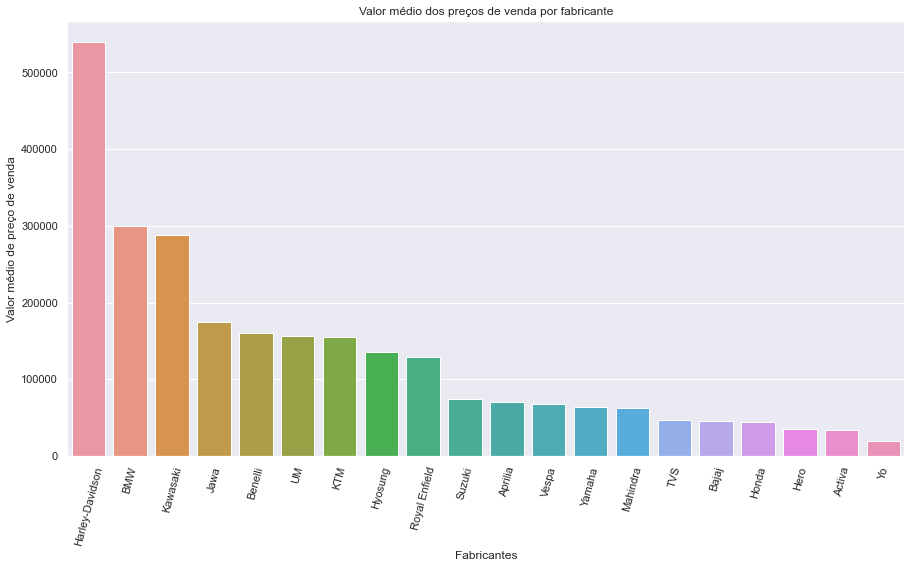

In [13]:
# Definição do tamanho da figura do gráfico
sns.set(rc = {'figure.figsize':(15,8)})

# Definição das colunas x e y do gráfico de barras
ax = sns.barplot(
    data = df_grouped,
    x    = 'company',
    y    = 'selling_price'
);

# Nomeando as colunas x e y, e colocando título na tabela
ax.set(
    xlabel = 'Fabricantes',
    ylabel = 'Valor médio de preço de venda',
    title  = 'Valor médio dos preços de venda por fabricante'
);

# Rotação dos nomes da coluna x
plt.xticks(rotation=75);


Como podemos observar, a fabricante que possui as motos com o maior valor médio para a venda é a Harley-Davidson.

#### 3. Qual o fabricante que possui a moto com o maior quilometragem?

R: Vamos agrupar os dados pela coluna de fabricante, coluna `company`, e verificar qual é o registro que possuí o maior valor de quilometragem percorrido através da coluna `km_driven`

In [14]:
df_grouped = df[['km_driven', 'company']].groupby('company')
df_grouped = df_grouped.mean().sort_values('km_driven', ascending=False).reset_index()
df_grouped.head()

,company,km_driven
0,Activa,167266.666667
1,Hero,44328.344828
2,TVS,42008.318841
3,Honda,36745.235294
4,Bajaj,33786.126923


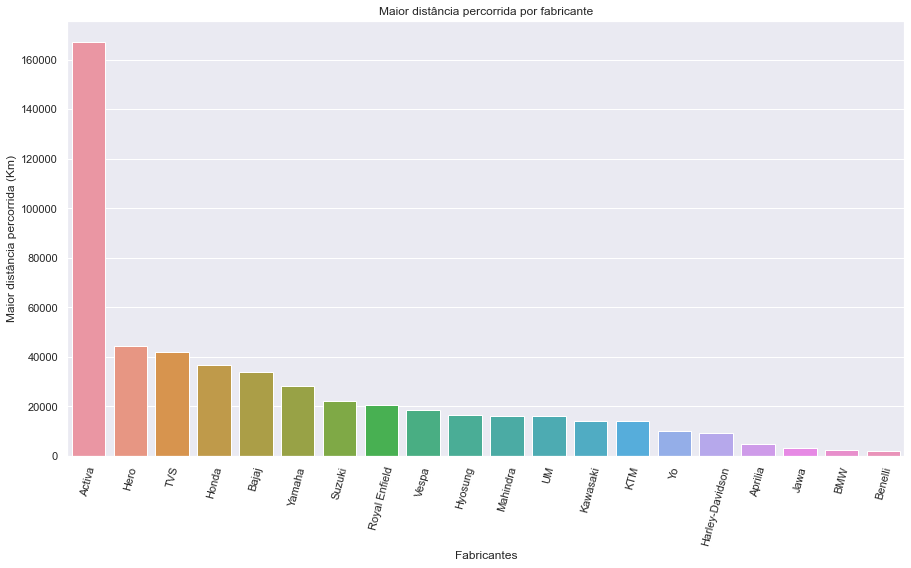

In [15]:
# Definição do tamanho da figura do gráfico
sns.set(rc = {'figure.figsize':(15,8)})

# Definição das colunas x e y do gráfico de barras
ax = sns.barplot(
    data = df_grouped,
    x = 'company',
    y = 'km_driven'
);

# Nomeando as colunas x e y, e colocando título na tabela
ax.set(
    xlabel = 'Fabricantes',
    ylabel = 'Maior distância percorrida (Km)',
    title = 'Maior distância percorrida por fabricante'
);

# Rotação dos nomes da coluna x
plt.xticks(rotation=75);

Como podemos observar, a fabricante `Activia` é a que possui a moto com a maior distância percorrida na base de dados.

#### 4. Qual o fabricante que possui a moto mais velha?

Vamos agrupar os dados por fabricante, coluna `company`, e depois pegar o registro com o menor valor cadastrado na coluna `year`, que representa o ano de fabricação da moto

In [16]:
df_grouped = df[['year', 'company']].groupby('company')
df_grouped = df_grouped.min().sort_values('year').reset_index()
df_grouped.head()

,company,year
0,Bajaj,1988
1,Royal Enfield,1993
2,Hero,1997
3,Yamaha,1997
4,TVS,1998


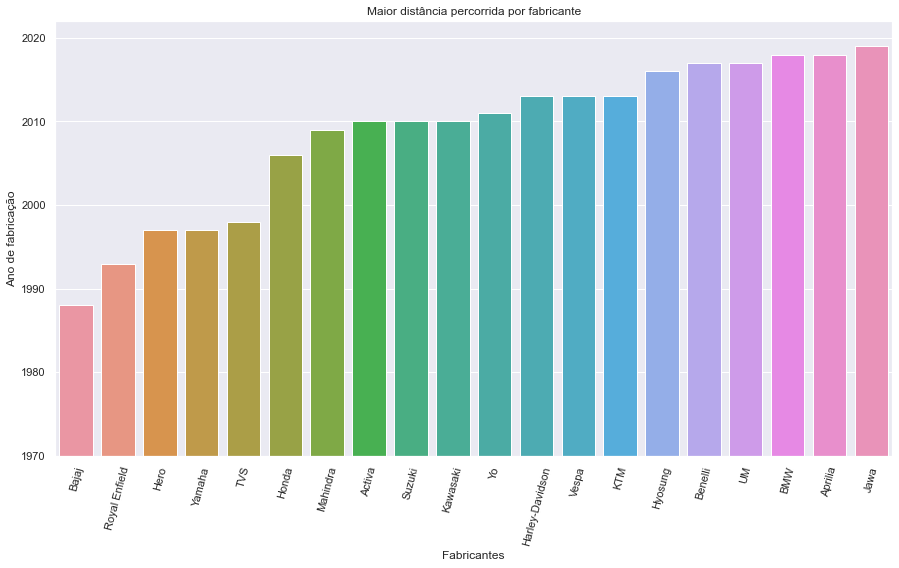

In [17]:
# Definição do tamanho da figura do gráfico
sns.set(rc = {'figure.figsize':(15,8)})

# Definição das colunas x e y do gráfico de barras
ax = sns.barplot(
    data = df_grouped,
    x = 'company',
    y = 'year'
);

# Nomeando as colunas x e y, e colocando título na tabela
ax.set(
    xlabel = 'Fabricantes',
    ylabel = 'Ano de fabricação',
    title  = 'Maior distância percorrida por fabricante',
    ylim   = [1970, 2022]
);

# Rotação dos nomes da coluna x
plt.xticks(rotation=75);

Como podemos observar, a fabricante que possui a moto mais antiga na base de dados é a `Bajaj`.

#### 5. O fabricante que possui a moto mais cara do Dataset é também o fabricante que possui menos motos cadastradas?

Vamos agrupar os dados pelas informações de fabricante, coluna `company`. Depois iremos selecionar as colunas de preço de venda e a coluna de identificação, colunas `selling_price` e `id` respectivamente. Na coluna de preço de venda iremos verificar o valor mais caro, e na coluna de identificação iremos realizar a contagem.

Para essa solicitação, iremos utilizar a função `agg` do pandas.

In [18]:
df_grouped = df[['id', 'selling_price', 'company']].groupby('company')

df_grouped = df_grouped.agg(
    max_selling_price = pd.NamedAgg('selling_price', 'max'),
    quantity = pd.NamedAgg('id', 'count'),
)

df_grouped = df_grouped.reset_index().sort_values('max_selling_price', ascending=False)
df_grouped.head()

,company,max_selling_price,quantity
14,Suzuki,760000.0,30
5,Harley-Davidson,750000.0,2
11,Kawasaki,425000.0,4
18,Yamaha,365000.0,102
2,BMW,300000.0,1


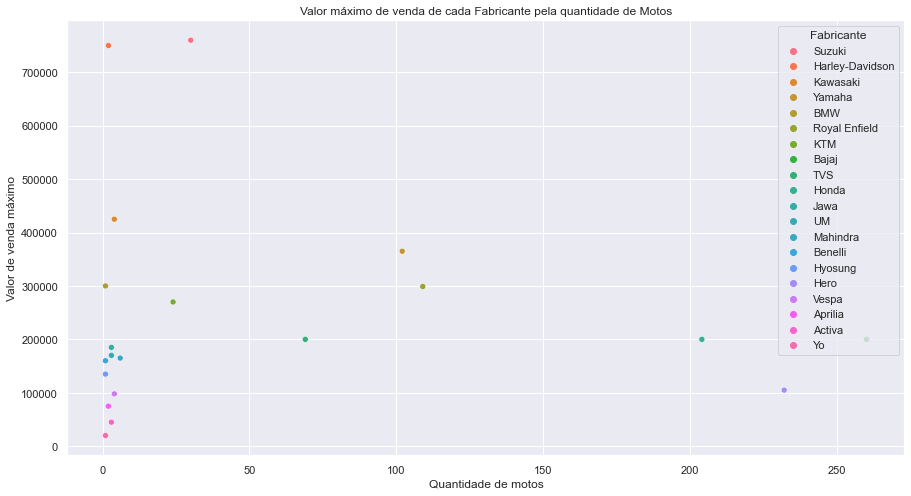

In [19]:
# Definição do tamanho da figura do gráfico
sns.set(rc = {'figure.figsize':(15,8)})

# Definição das colunas x e y do gráfico de barras
ax = sns.scatterplot(
    data = df_grouped,
    x    = 'quantity',
    y    = 'max_selling_price',
    hue  = 'company'
);

# Nomeando as colunas x e y, e colocando título na tabela
ax.set(
    xlabel = 'Quantidade de motos',
    ylabel = 'Valor de venda máximo',
    title = 'Valor máximo de venda de cada Fabricante pela quantidade de Motos'
);

# Muda o texto da legenda e sua localização
plt.legend(title='Fabricante', loc = 'upper right');

Como podemos observar, o fabricante que possui a moto mais cara na base de dados não é o fabricante que possui a menor quntidade de motos.

#### 6. Qual o fabricante que possui a menor variação de valor de venda?

Vamos agrupar os dados pela coluna de fabricante, `company`. Depois iremos calcular o desvio padrão da coluna do preço de venda e verificar qual deles possuí o maior valor do desvio padrão. Além disso, iremos calcular a média de valor de venda para posicionar o desvio padrão

Iremos também utilizar a função `agg` do pacote Pandas para fazer esses calculos.

In [20]:
df_grouped = df[['selling_price', 'company']].groupby('company')

df_grouped = df_grouped.agg(
    std = pd.NamedAgg('selling_price', 'std'),
    mean = pd.NamedAgg('selling_price', 'mean'),
)

df_grouped = df_grouped.reset_index().sort_values('std', ascending=True)
df_grouped.head()

,company,std,mean
1,Aprilia,7071.067812,70000.000000
9,Jawa,13228.756555,175000.000000
0,Activa,14933.184523,34000.000000
16,UM,15275.252317,156666.666667
6,Hero,17063.316928,34603.448276


#### 7. Quais motos eu devo comprar?

Leve em conta que eu desejo motos com no máximo 3 anos de uso; no máximo 40 mil quilometros rodados; que sejam de um único dono; que estejam sendo vendidas por possoas físicas e que tenham o valor pretendido de venda menor que o valor do showroom. Envie um relatório contendo o modelo, preço de venda, quilometro rodado e ano, ordenado por valor de venda de forma decrescente para o meu e-mail.

##### RESPOSTA
tempo da moto = no maximo 3 anos

km rodado = maximo 40 mil

donos = unico dono

tipo vendedor = pessoa fisica

valor de venda < valor showroom

In [21]:
df.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
0,0,Classic 350,175000.0,2019,Individual,1st owner,350,NaN,1,3,Royal Enfield
1,1,Dio,45000.0,2017,Individual,1st owner,5650,NaN,2,5,Honda
2,2,Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,3,4,Royal Enfield
3,3,Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,5,7,Yamaha
4,4,SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,5,11,Yamaha


In [22]:
df['year'].max()

2020

In [23]:
year = (df['year'] >= 2018)
km_rodado = (df['km_driven'] <= 400000)
donos = (df['owner'] == '1st owner' )
vendedor = (df['seller_type'] == 'Individual')
venda = (df['selling_price'] < df['ex_showroom_price'] )

In [24]:
columns = ['id', 'name', 'selling_price', 'km_driven', 'year']

In [25]:
df_selected = df.loc[
    year & km_rodado & donos & vendedor & venda,
    columns
].sort_values('selling_price', ascending = False)

In [26]:
#df_selected.to_excel('C:\\Users\\mlsil\\OneDrive\\Documentos\\repos\\fundamentos_programacao\\csv\\relatorio_motos.xlsx', index = False)